In [2]:
import torch

a = torch.empty(4,5) # 4X5 empty matrix 생성
print(a) # 쓰레기값 
# +) tensor로 잘 형성되었는지 확인해보고 싶다면 a의 data type을 확인해보면 된다.(e.g. float32로 출력된다면 32 bit의 float 자료형이 형성되었음을 의미)
print(a.dtype)

# torch.empty로 tensor을 형성하는 것은 tensor를 초기화하지 않았기 때문에 단순히 2차원의 4 x 5 행렬을 생성해준 꼴
# 초기화하고 싶다면? 
b = torch.zeros(4,5) # 영행렬
c = torch.rand(3,4) # random한 숫자로 배열을 채움.
d = torch.ones(3,4) # 모든 원소가 1인 3 x 4 array

print(b)
print(c)
print(d)

tensor([[8.9082e-39, 8.9082e-39, 1.0194e-38, 9.1837e-39, 4.6837e-39],
        [9.2755e-39, 1.0837e-38, 8.4490e-39, 1.0745e-38, 8.9082e-39],
        [9.9184e-39, 9.0000e-39, 1.0561e-38, 1.0653e-38, 4.1327e-39],
        [8.9082e-39, 9.8265e-39, 9.4592e-39, 1.0561e-38, 1.0653e-38]])
torch.float32
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0.9610, 0.4636, 0.5508, 0.6820],
        [0.7684, 0.2371, 0.1315, 0.3901],
        [0.1272, 0.9972, 0.8113, 0.4136]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [3]:
print(tensor_with_Data.device)

cpu


In [4]:
autograd1 = torch.ones(1,requires_grad=True) #(1, 1)
print(autograd1)
autograd1.backward()
print(autograd1.grad)

# 단일 TENSOR
autograd2 =  torch.tensor([1,2],dtype=float,requires_grad=True)
print(autograd2)
autograd2.backward() # 여기서 에러
print(autograd2.grad)


tensor([1.], requires_grad=True)
tensor([1.])
tensor([1., 2.], dtype=torch.float64, requires_grad=True)


RuntimeError: grad can be implicitly created only for scalar outputs

In [5]:
gradient = (autograd2).mean()
gradient.backward()
print(autograd2.grad)

gradient2 = (autograd2+5).mean()
gradient2.backward()
print(autograd2.grad) # autogra2.grad에 기울기가 누적됨을 알 수 있음!

tensor([0.5000, 0.5000], dtype=torch.float64)
tensor([1., 1.], dtype=torch.float64)


In [12]:
x = torch.ones(1,requires_grad=True)
with torch.no_grad():  # 기존에 정의된 gradient를 반영하지 않는다. 
    y = x * 2
    print(y.grad)
print(x)

None
tensor([1.], requires_grad=True)


In [3]:
import csv # 학습된 신경망을 불러올 때는 주로 csv 파일을 불러옵니다. 혹은 dataset이 csv인 경우도 있다. 
# 이번 실습에서는 npz의 dataset을 사용하기 때문에 import csv 부분이 필요하지는 않으나 신경망 학습에서는 거의 필수적이니 기억해두자!
import pandas as pd
import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset에는 각 데이터 및 그에 대한 label, 정답이 저장되어 있음
# DataLoader는 이 dataset의 데이터를 쉽게 불러오는 역할(학습할 때 학습용 데이터를 불러오는 등)

In [4]:
# CNN 실습 9에서 사용한 mnist.npz 파일을 사용하였다.
# 학습용 데이터와 테스트용 데이터를 따로 불러온다.

train_data = datasets.MNIST( # 자체적으로 mnist 데이터셋을 다운로드하는 코드 
    root=".", # 경로(***본인이 다운로드 받은 경로로 설정)
    train=True,
    download=True,
    transform=ToTensor() # 데이터를 tensor로 바꿔주는 코드
)
test_data = datasets.MNIST(
    root=".",
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

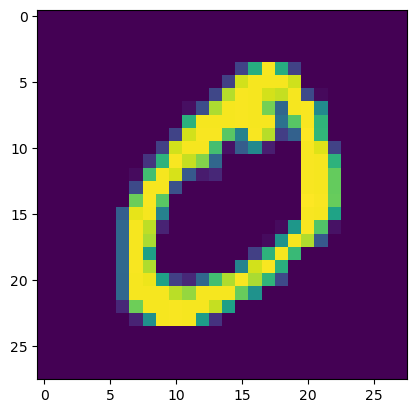

In [7]:
len(train_dataloader)

idx = 1
img, label = train_data[idx]
plt.imshow(img.squeeze())

학습에 필요한 데이터셋의 준비는 마쳤으니 데이터셋이 어떻게 구성되어 있는지 한번 확인하고 넘어가보려 한다. 데이터셋은 총 10개 숫자에 대한 데이터셋이며 이 데이터셋을 이루는 데이터를 임의로 뽑아 그래프에 plot하여 데이터셋을 들여다보자.

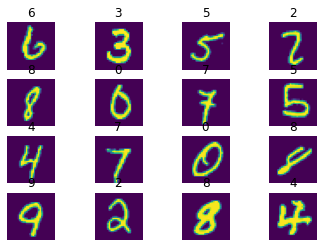

In [16]:
figure = plt.figure() # 데이터셋을 showing할 공간 만들기
column, row = 4, 4 # 본인이 데이터셋을 들여다 보고 싶은 만큼 행과 열을 조절할 수 있다.
title = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

for i in range(1, column * row + 1):
    # pick
    idx = torch.randint(len(train_data), (1,)).item() # train_data를 이루는 데이터의 index를 랜덤하게 뽑아 1차원 벡터로 만듦.
    img, label = train_data[idx] # idx 번째의 train_data는 image와 label(정답)로 이루어져있으므로 img, label로 분리
    
    # show
    figure.add_subplot(row, column, i) # add_subplot(nrows, ncols, index, **kwargs)의 함수 사용
    plt.title(title[label]) # 사진 위에 라벨 띄워줌
    plt.axis("off") # 깔끔하게
    
    plt.imshow(img.squeeze()) # squeeze()를 해주지 않으면 img.shape = (1,28,28)이므로 show()를 하지 못하고 에러 발생 --> 1차원을 없애주기위해 squeeze()를 해줌.
    # print(img.shape) -> torch.Size([1,28.28])
    # print((img.squeeze()).shape) -> torch.Size([28,28])

In [17]:
import os
from torchvision.io import read_image

class CustomDataset(Dataset): # torch.utils.data import Dataset
    # Dataset 클래스를 상속하면, 위 3개의 데이터셋을 구현해야만 한다. 
    def __init__(self, csv_file, path, data_transform=None, label_transform=None): 
        # 클래스의 생성자(constructor)로 자동 호출되는 init 함수
        # 데이터의 전처리
        self.labels = pd.read_csv(csv_file, names=['file_name', 'label'])
        self.path = path
        self.data_transform = data_transform
        self.label_transform = label_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        img_path = os.path.join(self.path, self.labels.iloc[index, 0])
        img = read_image(img_path)
        label = self.img_labels.iloc[index, 1]
        if self.data_transform:
            img = self.data_transform(img)
        if self.label_transform:
            label = self.label_transform(label)
        return img, label

In [8]:
import torch.nn as nn # 신경망 구성 layer
import torch.optim as optim # 최적화 기법
import torch.nn.init # 초기화 기법
import torch.nn.functional as F # Fully-connected layer을 사용하기 위해

# torch.nn.Linear(input sample.size(), output sample.size(), bias = True, device = None, dtype =None) data를 선형 변환하며 bias는 True가 default
# torch.nn.ReLu()
class CNN(nn.Module):
    def __init__(self): # 파이썬에서 클래스의 생성자(constructor)에 해당하는 init 함수로, 클래스가 호출되면 자동으로 호출.
        
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,20,5,1) # 2차원 convolution, input 채널 1개, output 채널 1개, size of a kernel : 5*5, stride = 1
        self.conv2 = nn.Conv2d(20,10,5,1) # input 20개, output 10개
        self.pool = nn.MaxPool2d(2)
        # self.fc1 = nn.Linear(160, 64)
        # self.sf = nn.Softmax(dim = 1)

        
        self.combination = nn.Sequential(
                           nn.Linear(160, 64),
                           nn.ReLU(), 
                           nn.Linear(64, 10),
                           )


        # 참고)  # self.combination = nn.Sequential(
                 #    nn.Linear(256, 64),
                 #    nn.ReLU(), # activation 함수로 ReLU 선택
                 #    nn.Linear(64, 10),
                 #) 이런식으로 하나의 조합으로 nn.Sequential()에 묶어 사용할 수도 있다.

    def forward(self, x):
       
        # forward 코드를 작성해주세요
        # x = ~ 형태로 작성하면 되겠죠 ?
        # 각 줄의 주석에 맞는 코드를 작성부탁드립니다! (---- 부분에 코드 입력)
        
        #입력 데이터 x를 self.conv1 컨볼루션 레이어를 통해 변환
        x = self.conv1(x)
        #활성화 함수 ReLU를 적용하여 비선형성을 도입
        x = F.relu(x) # torch.nn.functional as F
        #풀링 레이어를 사용하여 x의 공간 크기를 줄여보자
        x = self.pool(x)
        #컨볼루션 레이어를 통해 x를 다시 변환
        x = self.conv2(x)
        #그리고 수행해야 하는 코드 2줄 작성 부탁드립니다.
        x = F.relu(x)
        x = self.pool(x)
        
        #텐서 x의 형태를 변경하여 flatten 실행
        x = x.view(x.shape[0], -1) # flatten: x.shape[0]에는 배치 사이즈
        
        x = self.combination(x)
        
        return F.log_softmax(x , dim = 1)

In [9]:
model = CNN() # 모델 instantiation for training

# 모델 학습 파라미터 지정 
learning_rate = 0.01 # 무조건 작다고 좋지 않다.
batch_size = 55 # 전체 데이터 수에 비해 작은 값을 설정하면 한 epoch당 소요되는 시간이 늘어난다.
epochs = 15

In [10]:
# 손실 함수 정의
# mynn 라이브러리를 사용한 머신러닝 실습 9에서는 'from mygrad.nnet.losses import softmax_crossentropy'로 불러왔다.
lossfunc = nn.CrossEntropyLoss() 

In [11]:
# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 
# 거의 공식처럼 많이 사용하는 구문으로 model.parameters()는 모델이 학습하면서 내놓은 매개변수를 반환하며
# 이 파라미터를 계속 최적화해나가는 것이 옵티마이저(optimizer)의 역할이다.
# mynn에서는 함수를 새로 짜서 'def parameters(self):'로 매개변수를 불러왔지만 Pytorch는 이 함수를 .parameters() 함수로 지원한다!

In [19]:

for epoch in range(epochs):
    train_loss = 0

    for i, traindata in enumerate(train_dataloader):
        x, label = traindata # MNIST 데이터에는 정보와 labeling이 있었으므로 각각을 x와 label로 분리해준다.

        # mynn 실습에서는 xavier_glorot normal 초기화 기법을 layer와 함께 정의해주었는데
        # , Pytorch에서 CNN 학습에서는 주로 optimizer.zero_grad()을 통해 모델 전체의 gradient을 초기화해준다.
        # 여기에 작성해주세요
        optimizer.zero_grad()

        # x 데이터를 이제 학습시키기 위해 forward 함수를 실행한다.
        # forward propagation(순전파)
        # 여기에 작성해주세요
        pred = model.forward(x) # model.forward(x)
        
        # 앞서 정의한 손실함수를 정의하며 forward를 지난 data와 label간 loss을 계산합니다. 이를 train_loss에 저장할 것이다.
        #여기에 작성해주세요
        loss = lossfunc(pred, label)

        # back propagation!!
         #여기에 작성해주세요
        loss.backward()
        
        
        # 매개변수를 매 step마다 업데이트 해준다.
        #여기에 작성해주세요
        optimizer.step()
        
        train_loss += loss
         
    with torch.no_grad(): # 모델 성능을 평가하기 위한 코드이므로 autograd가 되지 않도록 설정.
        correct = 0 # 맞은 개수 세기 위해 int 정의
        total = 0 # 전체 실행 개수를 세서 정확도를 계산하기 위해 int 정의

        for i,testdata in enumerate(test_dataloader):
            y, label = testdata
            #가장 높은 확률의 것을 prediction으로 반환하는 코드 작성.
            #여기에 작성해주세요
            pred = torch.argmax(model(y), dim = 1) # todo code : 가장 높은 확률의 것을 prediction으로 반환하는 argmax
            correct += (label==pred).sum().item()## label과 prediction이 일치하는 개수 세기 
            total += len(label)
    print("[Epoch %d] loss: %.3f, acc: %.2f" \
        % (epoch + 1, train_loss / len(train_dataloader), 100.*correct/total))# epoch별 loss와 정확도를 출력하는 코드를 작성
    train_loss = 0 # 다음 epoch가 실행되기전 loss 초기화

[Epoch 1] loss: 1.558, acc: 79.67
[Epoch 2] loss: 0.321, acc: 93.75
[Epoch 3] loss: 0.197, acc: 94.62
[Epoch 4] loss: 0.146, acc: 96.51
[Epoch 5] loss: 0.119, acc: 96.85
[Epoch 6] loss: 0.104, acc: 97.14
[Epoch 7] loss: 0.093, acc: 97.64
[Epoch 8] loss: 0.085, acc: 97.60
[Epoch 9] loss: 0.078, acc: 97.82
[Epoch 10] loss: 0.073, acc: 97.95
[Epoch 11] loss: 0.069, acc: 98.20
[Epoch 12] loss: 0.065, acc: 98.08
[Epoch 13] loss: 0.063, acc: 97.41
[Epoch 14] loss: 0.060, acc: 98.14
[Epoch 15] loss: 0.057, acc: 98.32
